#  Event generation with self-contrastive estimation

The aim of this notebook is to use self-contrastive estimation to learn the distribution of one observable, conditioned on one parameter, but written in a way which generalises to more observables and parameters.

In [2]:
#  Required imports

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

'''from keras.layers     import BatchNormalization, Dense, Dropout, Input, LeakyReLU, Concatenate
from keras.models     import Model, Sequential
from keras.optimizers import Adam, SGD, RMSprop

import keras.backend as K'''

from backends       import stats as backend_stats
from backends.Param import Param
from backends       import models
from backends.ParameterisedSimulator import ParameterisedSimulator, Simulator_Model2, Simulator_Model3
from backends.SamplingSimulator      import SamplingSimulator

Using TensorFlow backend.


In [3]:
#  Program constants

mu_range         = [-2, 3]
n_plot_points    = 6
xsec_scan_points = 7
pdf_scan_points  = 5

n_points = 5000

In [4]:
model = Simulator_Model3

plot_points    = np.linspace(mu_range[0], mu_range[1], n_plot_points)
plot_xsections = {}
plot_datasets  = {}

for plot_point in plot_points :
    model.set_param_value("c", plot_point)
    xsec, dataset = model.generate(n_points)
    plot_xsections [plot_point] = xsec
    plot_datasets  [plot_point] = dataset
    
model.set_param_value("c", 0)
xsec_SM, dataset_SM = plot_xsections[0], plot_datasets[0]

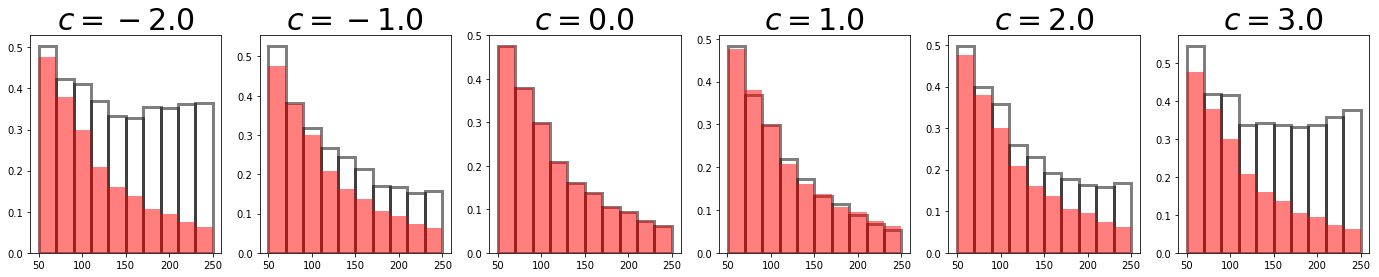

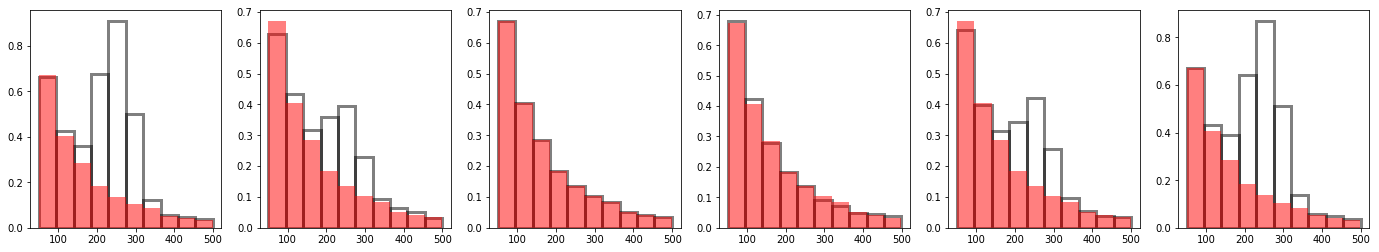

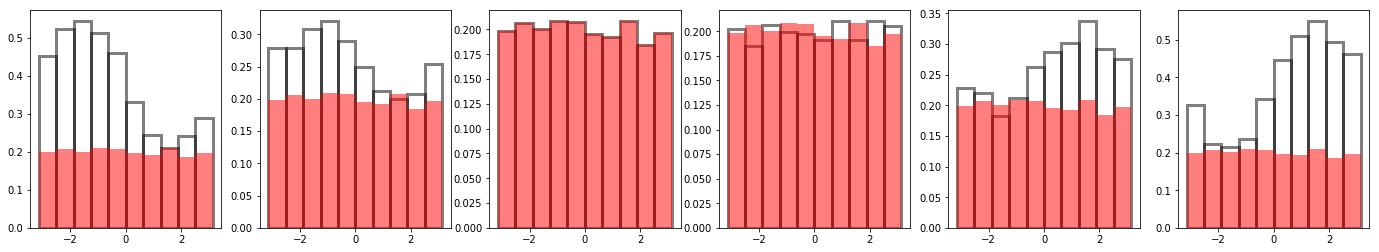

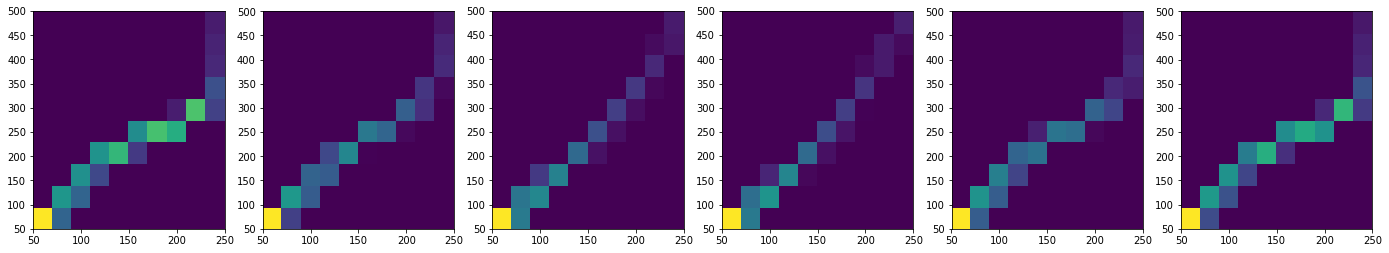

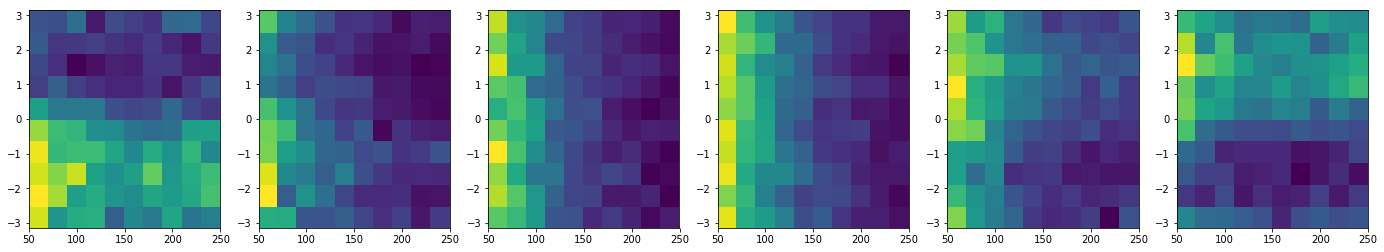

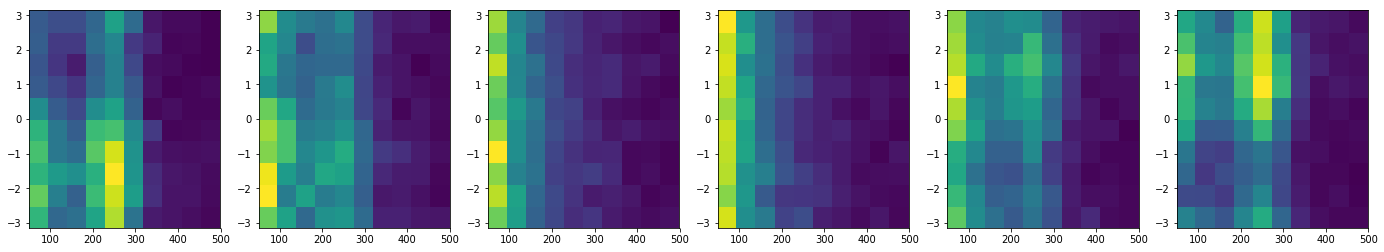

In [7]:
fig = plt.figure(figsize=(4*n_plot_points,4))
for ax_idx, plot_point in enumerate(plot_points) :
    dataset = plot_datasets  [plot_point]
    xsec    = plot_xsections [plot_point]
    ax1 = fig.add_subplot(1, n_plot_points, ax_idx+1)
    ax1.hist(dataset   [:,0], alpha=0.5, weights=np.full(shape=dataset   [:,0].shape, fill_value=xsec   /n_points), fill=False, edgecolor="k", linestyle="-" , linewidth=3)
    ax1.hist(dataset_SM[:,0], alpha=0.5, weights=np.full(shape=dataset_SM[:,0].shape, fill_value=xsec_SM/n_points), fill=True , color    ="r", linestyle="-" , linewidth=3)
    ax1.set_title(f"$c = {plot_point}$", fontsize=30)
    if ax_idx > 0 : continue
    #ax1.set_ylabel(r"$\frac{d\sigma}{dA}$", fontsize=30, rotation=0, labelpad=40)
plt.show()

fig = plt.figure(figsize=(4*n_plot_points,4))
for ax_idx, plot_point in enumerate(plot_points) :
    dataset = plot_datasets  [plot_point]
    xsec    = plot_xsections [plot_point]
    ax1 = fig.add_subplot(1, n_plot_points, ax_idx+1)
    ax1.hist(dataset   [:,1], alpha=0.5, weights=np.full(shape=dataset   [:,1].shape, fill_value=xsec   /n_points), fill=False, edgecolor="k", linestyle="-" , linewidth=3)
    ax1.hist(dataset_SM[:,1], alpha=0.5, weights=np.full(shape=dataset_SM[:,1].shape, fill_value=xsec_SM/n_points), fill=True , color    ="r", linestyle="-" , linewidth=3)
    #ax1.set_title(f"$c = {plot_point}$", fontsize=30)
    if ax_idx > 0 : continue
    #ax1.set_ylabel(r"$\frac{d\sigma}{dB}$", fontsize=30, rotation=0, labelpad=40)
plt.show()

fig = plt.figure(figsize=(4*n_plot_points,4))
for ax_idx, plot_point in enumerate(plot_points) :
    dataset = plot_datasets  [plot_point]
    xsec    = plot_xsections [plot_point]
    ax1 = fig.add_subplot(1, n_plot_points, ax_idx+1)
    ax1.hist(dataset   [:,2], alpha=0.5, weights=np.full(shape=dataset   [:,2].shape, fill_value=xsec   /n_points), fill=False, edgecolor="k", linestyle="-" , linewidth=3)
    ax1.hist(dataset_SM[:,2], alpha=0.5, weights=np.full(shape=dataset_SM[:,2].shape, fill_value=xsec_SM/n_points), fill=True , color    ="r", linestyle="-" , linewidth=3)
    #ax1.set_title(f"$c = {plot_point}$", fontsize=30)
    if ax_idx > 0 : continue
    #ax1.set_ylabel(r"$\frac{d\sigma}{dC}$", fontsize=30, rotation=0, labelpad=40)
plt.show()

fig = plt.figure(figsize=(4*n_plot_points,4))
for ax_idx, plot_point in enumerate(plot_points) :
    dataset = plot_datasets  [plot_point]
    ax1 = fig.add_subplot(1, n_plot_points, ax_idx+1)
    ax1.hist2d(dataset[:,0], dataset[:,1])
plt.show()

fig = plt.figure(figsize=(4*n_plot_points,4))
for ax_idx, plot_point in enumerate(plot_points) :
    dataset = plot_datasets  [plot_point]
    ax1 = fig.add_subplot(1, n_plot_points, ax_idx+1)
    ax1.hist2d(dataset[:,0], dataset[:,2])
plt.show()

fig = plt.figure(figsize=(4*n_plot_points,4))
for ax_idx, plot_point in enumerate(plot_points) :
    dataset = plot_datasets  [plot_point]
    ax1 = fig.add_subplot(1, n_plot_points, ax_idx+1)
    ax1.hist2d(dataset[:,1], dataset[:,2])
plt.show()


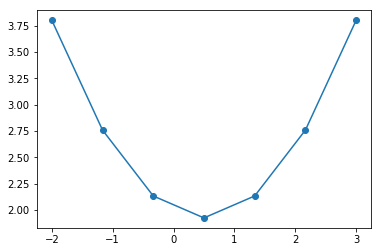

In [5]:
x = np.linspace(mu_range[0], mu_range[1], xsec_scan_points)
y = {}
for xp in x :
    model.set_param_value("c", xp)
    y[xp], _ = model.generate(0)
plt.plot(x, [y[xp] for xp in x], "o-")
plt.show()

In [6]:
def noise_model1 (self, x, *argv, **kwargs) :
    if hasattr(self, "return_value") == False :
        A_lims = [50, 250]
        B_lims = [50, 500]
        C_lims = [-1.*np.pi, np.pi]
        A_range = A_lims[1] - A_lims[0]
        B_range = B_lims[1] - B_lims[0]
        C_range = C_lims[1] - C_lims[0]
        self.return_value = 1. / (A_range*B_range*C_range)
    return self.return_value

def noise_model2 (self, x, *argv, **kwargs) :
    if hasattr(self, "return_value") == False :
        B_lims = [50, 500]
        C_lims = [-1.*np.pi, np.pi]
        B_range = B_lims[1] - B_lims[0]
        C_range = C_lims[1] - C_lims[0]
        self.return_value = 1. / (B_range*C_range)
    return self.return_value * stats.norm.pdf(x[0], 150, 50)

class NoiseModel :
    def clear (self) :
        self.name  = ""
        self.model = None
    def evaluate (self, x) :
        if type(self.model) == type(None) :
            raise RuntimeError(f"Cannot evaluate PDF - no function set")
        return self.model(self, x)
    @classmethod
    def from_noise_and_model (cls, noise, disc, new_name="") :
        def new_model (self, x, *argv, **kwargs) :
            f = noise.evaluate(x)
            D = disc.predict(np.array([x]))
            return D * f / (1.-D)
        return cls(new_name, new_model)
    def __init__ (self, name="", model=None) :
        self.clear()
        self.name  = name
        self.model = model
        
NoiseModel1 = NoiseModel("NoiseModel1", noise_model1)
NoiseModel2 = NoiseModel("NoiseModel2", noise_model2)

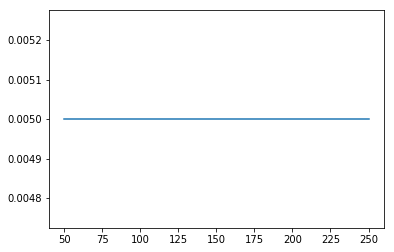

In [7]:
y = []
A_range = 200.
B_range = 450.
C_range = 2.*np.pi
n_points_A = 40
n_points_B = 40
n_points_C = 40
spacing_A  = A_range / (n_points_A)
spacing_B  = B_range / (n_points_B)
spacing_C  = C_range / (n_points_C)
samples_A = np.linspace(50, 250, n_points_A)
samples_B = np.linspace(50, 500, n_points_B)
samples_C = np.linspace(-1.*np.pi, np.pi, n_points_C)
for A in samples_A :
    yp = 0.
    for B in samples_B :
        for C in samples_C :
            yp = yp + NoiseModel1.evaluate([A,B,C]) * (spacing_B*spacing_C)
    y.append(yp)
plt.plot(samples_A, y)
plt.show()


In [8]:
n_train_points_per_c_per_ds = 10000

noise_simulator = SamplingSimulator(name="noise_generator", 
                              model=NoiseModel1, 
                              axes=[samples_A, samples_B, samples_C])

noise_datapoints = noise_simulator.generate(n_train_points_per_c_per_ds)

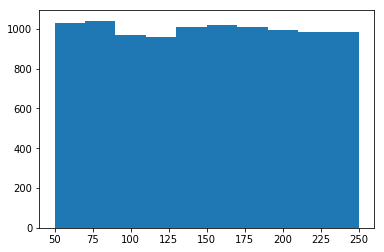

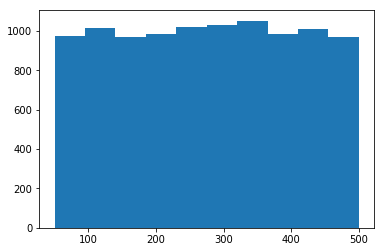

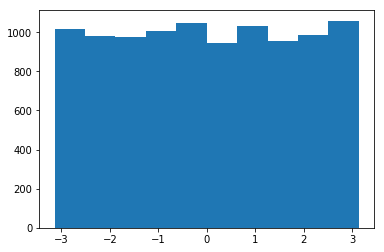

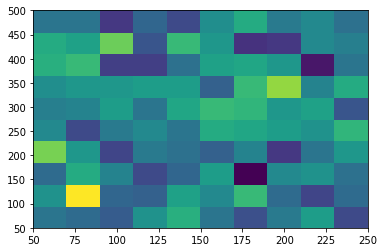

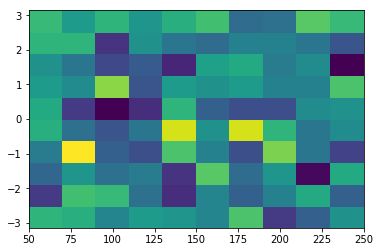

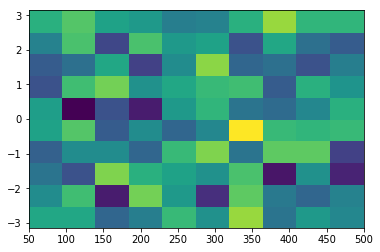

In [9]:

plt.hist(noise_datapoints[:,0])
plt.show()

plt.hist(noise_datapoints[:,1])
plt.show()

plt.hist(noise_datapoints[:,2])
plt.show()

plt.hist2d(noise_datapoints[:,0], noise_datapoints[:,1])
plt.show()

plt.hist2d(noise_datapoints[:,0], noise_datapoints[:,2])
plt.show()

plt.hist2d(noise_datapoints[:,1], noise_datapoints[:,2])
plt.show()

In [10]:
def shuffle (A, B) :
    pairs = [(a,b) for a, b in zip(A, B)]
    np.random.shuffle(pairs)
    return np.array([p[0] for p in pairs]), np.array([p[1] for p in pairs])

In [11]:
from keras.callbacks import EarlyStopping

In [12]:
learn_datapoints = plot_datasets[-2.]

train_DS_fake = noise_datapoints[np.random.randint(0, noise_datapoints.shape[0], n_train_points_per_c_per_ds),:]
train_DS_true = learn_datapoints[np.random.randint(0, learn_datapoints.shape[0], n_train_points_per_c_per_ds),:]

labels_true = np.array([1. for i in range(n_train_points_per_c_per_ds)])
labels_fake = np.array([0. for i in range(n_train_points_per_c_per_ds)])

train_data   = np.concatenate([train_DS_true, train_DS_fake])
train_labels = np.concatenate([labels_true  , labels_fake  ])

train_data, train_labels = shuffle(train_data, train_labels)


In [13]:
disc = models.create_unconditional_discriminator (dropout=0.1,
                                                  num_categories  = 1,
                                                  num_conditions  = 1,
                                                  num_observables = 3,
                                                  batch_norm      = False,
                                                  mid_layers      = (50,50,50))

history = disc.fit(train_data, 
         train_labels,
         validation_split = 0.5,
         callbacks = [EarlyStopping(patience=5, restore_best_weights=True)],
         epochs=1000,
         shuffle=True)

Creating discriminator with 3 observables and 1 conditions
Instructions for updating:
Colocations handled automatically by placer.
Model: "Discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                200       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 50)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 50)               

10000/10000 [==============================] - 0s 47us/step - loss: 0.2067 - val_loss: 0.1891
Epoch 55/1000
10000/10000 [==============================] - 1s 52us/step - loss: 0.1999 - val_loss: 0.1775
Epoch 56/1000
10000/10000 [==============================] - 0s 46us/step - loss: 0.2031 - val_loss: 0.1801
Epoch 57/1000
10000/10000 [==============================] - 1s 55us/step - loss: 0.1991 - val_loss: 0.1733
Epoch 58/1000
10000/10000 [==============================] - 0s 47us/step - loss: 0.2037 - val_loss: 0.1800


In [14]:
constrastive_model = NoiseModel.from_noise_and_model(NoiseModel1, disc, "constrastive_model")

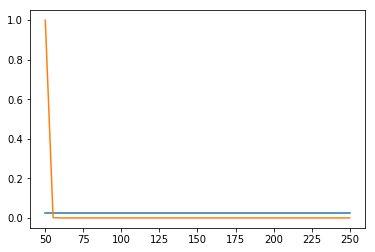

In [15]:
x = samples_A
y2 = []
for A in x :
    yp = 0.
    yp = yp + constrastive_model.evaluate([A,50.,0.])[0][0] * (spacing_B*spacing_C)
    y2.append(yp)
plt.plot(x, y/np.sum(y))
plt.plot(x, y2/np.sum(y2))
plt.show()

In [16]:
noise_simulator2 = SamplingSimulator(name="noise_generator2", 
                              model=constrastive_model, 
                              axes=[samples_A, samples_B, samples_C])

noise_datapoints2 = noise_simulator2.generate(n_train_points_per_c_per_ds)

In [17]:
plot_noise_datapoints2 = noise_datapoints2 # noise_simulator2.generate(100000)

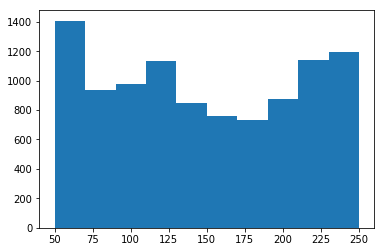

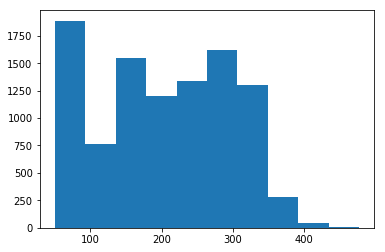

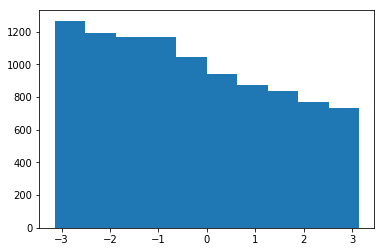

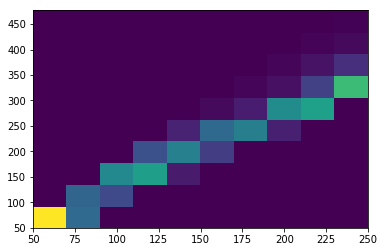

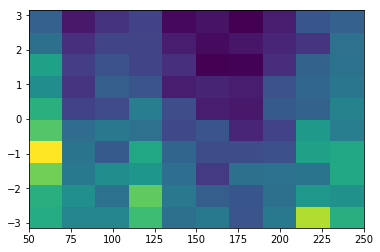

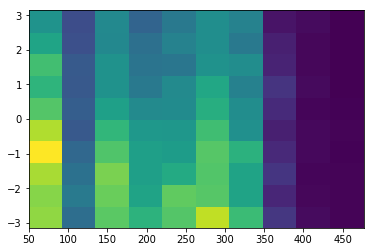

In [18]:

plt.hist(plot_noise_datapoints2[:,0])
plt.show()

plt.hist(plot_noise_datapoints2[:,1])
plt.show()

plt.hist(plot_noise_datapoints2[:,2])
plt.show()

plt.hist2d(plot_noise_datapoints2[:,0], plot_noise_datapoints2[:,1])
plt.show()

plt.hist2d(plot_noise_datapoints2[:,0], plot_noise_datapoints2[:,2])
plt.show()

plt.hist2d(plot_noise_datapoints2[:,1], plot_noise_datapoints2[:,2])
plt.show()

In [19]:
train_DS_true2 = learn_datapoints  [np.random.randint(0, learn_datapoints .shape[0], n_train_points_per_c_per_ds),:]
train_DS_fake2 = noise_datapoints2 [np.random.randint(0, noise_datapoints2.shape[0], n_train_points_per_c_per_ds),:]

train_data2   = np.concatenate([train_DS_true2, train_DS_fake2])
train_labels2 = np.concatenate([labels_true   , labels_fake  ])
train_data2, train_labels2 = shuffle(train_data, train_labels)


In [20]:
disc2 = models.create_unconditional_discriminator (dropout=0.1,
                                                  num_categories  = 1,
                                                  num_observables = 3,
                                                  batch_norm      = True,
                                                  mid_layers      = (50,50,50))

history = disc2.fit(train_data2, 
         train_labels2,
         validation_split = 0.5,
         callbacks = [EarlyStopping(patience=5, restore_best_weights=True)],
         epochs=1000,
         shuffle=True)

Creating discriminator with 3 observables and None conditions
Model: "Discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                200       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 50)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                2550      
_________________________________________________________

In [ ]:
constrastive_model2 = NoiseModel.from_noise_and_model(constrastive_model, disc2, "constrastive_model2")

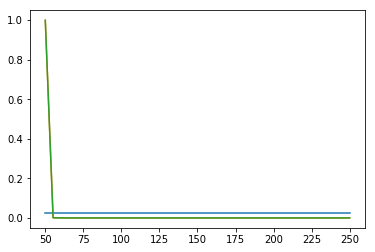

In [22]:
x = samples_A
y3 = []
for A in x :
    yp = 0.
    yp = yp + constrastive_model2.evaluate([A,50.,0.])[0][0] * (spacing_B*spacing_C)
    y3.append(yp)
plt.plot(x, y /np.sum(y ))
plt.plot(x, y2/np.sum(y2))
plt.plot(x, y3/np.sum(y3))
plt.show()

In [23]:
noise_simulator3 = SamplingSimulator(name="noise_generator3", 
                              model=constrastive_model2, 
                              axes=[samples_A, samples_B, samples_C])

noise_datapoints3 = noise_simulator3.generate(n_train_points_per_c_per_ds)

KeyboardInterrupt: 

In [ ]:

plt.hist(noise_datapoints3[:,0])
plt.show()

plt.hist(noise_datapoints3[:,1])
plt.show()

plt.hist(noise_datapoints3[:,2])
plt.show()

plt.hist2d(noise_datapoints3[:,0], noise_datapoints3[:,1])
plt.show()

plt.hist2d(noise_datapoints3[:,0], noise_datapoints3[:,2])
plt.show()

plt.hist2d(noise_datapoints3[:,1], noise_datapoints3[:,2])
plt.show()
